In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df = pd.read_csv("walmart_data.csv")

In [19]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


## <font color='purple'>1. Defining Problem Statement and Analyzing basic metrics .</font>

#### 1. Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), statistical summary

In [20]:
df.shape

print(f"There are {df.shape[0]} rows and {df.shape[1]} columns are present in the dataset ")

There are 550068 rows and 10 columns are present in the dataset 


In [21]:
df.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

In [22]:
df.info(memory_usage='deep')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 179.4 MB


In [23]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [24]:
df.describe(include = "object")

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,550068,550068,550068,550068,550068
unique,3631,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1880,414259,219587,231173,193821


In [42]:
df['Product_ID'] = df['Product_ID'].astype('category')
df["Gender"] = df["Gender"].astype("category")
df["Age"] = df["Age"].astype("category")
df["Occupation"] = df["Occupation"].astype("category")
df["Product_Category"] = df["Product_Category"].astype("category")
df["Marital_Status"] = df["Marital_Status"].astype("category")
df["City_Category"] = df["City_Category"].astype("category")
df["Stay_In_Current_City_Years"] = df["Stay_In_Current_City_Years"].astype("category")

In [43]:
df.dtypes

User_ID                          int64
Product_ID                    category
Gender                        category
Age                           category
Occupation                    category
City_Category                 category
Stay_In_Current_City_Years    category
Marital_Status                category
Product_Category              category
Purchase                         int64
dtype: object

In [39]:
df.info(memory_usage='deep')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  int64   
 1   Product_ID                  550068 non-null  category
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  category
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  int64   
 8   Product_Category            550068 non-null  int64   
 9   Purchase                    550068 non-null  int64   
dtypes: category(6), int64(4)
memory usage: 20.8 MB


#### 2. Non-Graphical Analysis: Value counts and unique attributes 

In [28]:
df["Gender"].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

In [29]:
df["Age"].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [31]:
df["City_Category"].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

In [32]:
df["Stay_In_Current_City_Years"].value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

In [33]:
df["Marital_Status"].value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

In [36]:
df["Occupation"].value_counts().sort_index()

0     69638
1     47426
2     26588
3     17650
4     72308
5     12177
6     20355
7     59133
8      1546
9      6291
10    12930
11    11586
12    31179
13     7728
14    27309
15    12165
16    25371
17    40043
18     6622
19     8461
20    33562
Name: Occupation, dtype: int64

In [41]:
df["Product_Category"].value_counts().sort_index()

1     140378
2      23864
3      20213
4      11753
5     150933
6      20466
7       3721
8     113925
9        410
10      5125
11     24287
12      3947
13      5549
14      1523
15      6290
16      9828
17       578
18      3125
19      1603
20      2550
Name: Product_Category, dtype: int64

In [48]:
df["Product_ID"].value_counts().sort_values(ascending = False)

P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00065542       1
P00107442       1
P00135942       1
P00065942       1
P00231642       1
Name: Product_ID, Length: 3631, dtype: int64

In [49]:
df["Product_ID"].nunique()

3631

#### 3. Visual Analysis - Univariate & Bivariate

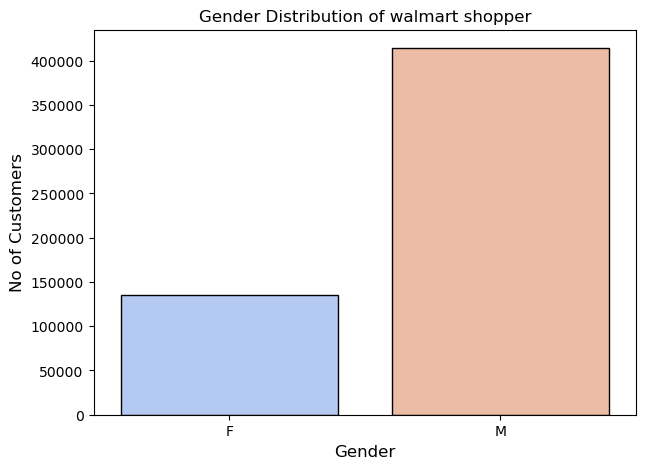

In [66]:
plt.figure(figsize = (7, 5))
sns.countplot(data = df, x= "Gender", palette="coolwarm",edgecolor="black")
plt.xlabel("Gender", fontsize = 12)
plt.ylabel("No of Customers", fontsize = 12)
plt.title("Gender Distribution of walmart shopper")
plt.show()

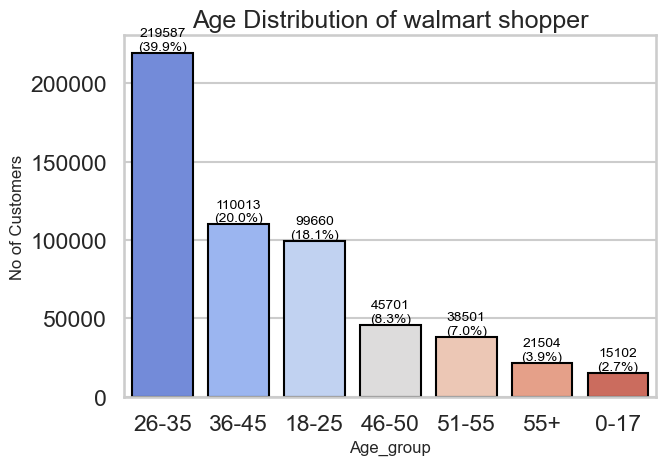

In [97]:
plt.figure(figsize = (7, 5))
ax = sns.countplot(data = df, x= "Age",order=df['Age'].value_counts(ascending=False).index,palette="coolwarm",edgecolor="black")
plt.xlabel("Age_group", fontsize = 12)
plt.ylabel("No of Customers", fontsize = 12)
plt.title("Age Distribution of walmart shopper")

# Add annotations
total = len(df)
for p in ax.patches:
    count = int(p.get_height())
    percentage = 100 * count / total
    ax.annotate(
        f'{count}\n({percentage:.1f}%)',              # text to display
        (p.get_x() + p.get_width() / 2., count),      # position of text
        ha='center', va='bottom',
        fontsize=10, color='black'
    )

# Improve layout
plt.tight_layout()
plt.show()

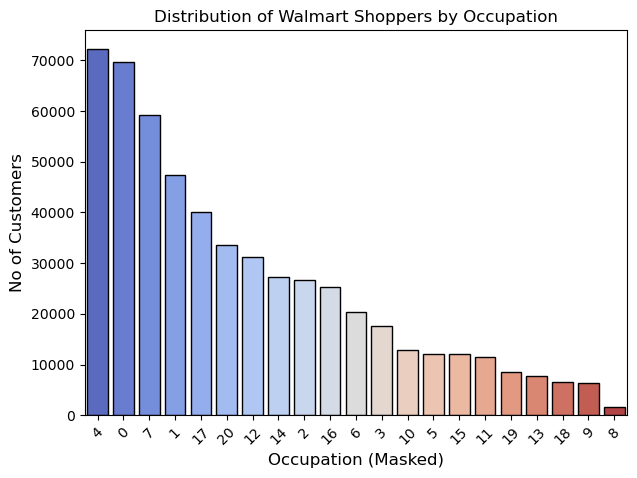

In [79]:
plt.figure(figsize = (7, 5))
sns.countplot(data = df, x= "Occupation",order=df['Occupation'].value_counts(ascending=False).index,palette="coolwarm",edgecolor="black")
plt.xlabel("Occupation (Masked)", fontsize = 12)
plt.ylabel("No of Customers", fontsize = 12)
plt.title("Distribution of Walmart Shoppers by Occupation")
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

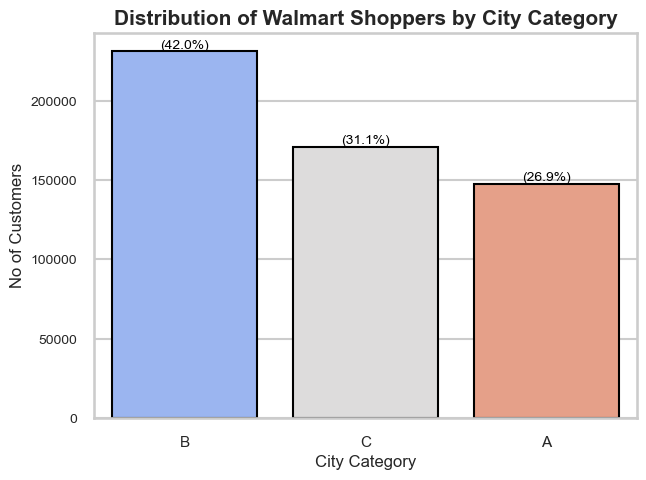

In [99]:
sns.set(style="whitegrid", context="talk")
plt.figure(figsize = (7, 5))
ax = sns.countplot(data = df, x= "City_Category",order=df['City_Category'].value_counts(ascending=False).index,palette="coolwarm",edgecolor="black")
plt.xlabel("City Category", fontsize = 12)
plt.ylabel("No of Customers", fontsize = 12)
plt.title("Distribution of Walmart Shoppers by City Category",fontsize=15, weight='bold')
plt.xticks(fontsize=11)
plt.yticks(fontsize=10)

# Add annotations
total = len(df)
for p in ax.patches:
    count = int(p.get_height())
    percentage = 100 * count / total
    ax.annotate(
        f'({percentage:.1f}%)',              # text to display
        (p.get_x() + p.get_width() / 2., count),      # position of text
        ha='center', va='bottom',
        fontsize=10, color='black'
    )
plt.show()

## <font color='purple'>2. Missing Value & Outlier Detection .</font>

In [57]:
df_missing_values = pd.DataFrame({"Missing_values": df.isnull().sum(), "Percentage": (df.isnull().sum()/len(df))*100 })
df_missing_values

,Missing_values,Percentage
User_ID,0,0.0
Product_ID,0,0.0
Gender,0,0.0
Age,0,0.0
Occupation,0,0.0
City_Category,0,0.0
Stay_In_Current_City_Years,0,0.0
Marital_Status,0,0.0
Product_Category,0,0.0
Purchase,0,0.0


- No missing values present in the dataset